**Visualizing 32x32 grayscale Minecraft screenshots where one of five different block types is located at different positions in 3D space using dimensionality reduction.**

**Important note: in-progress, currently incomplete.**

* **Principal Component Analysis**
* ***(Next: t-SNE)***

In [23]:
from matplotlib import pyplot as plt
import matplotlib.cm as cm
from PIL import Image
import scipy.ndimage
import scipy.misc
import numpy as np
%matplotlib inline

In [178]:
PATH = '/Users/cosmo/mldata/single-block-dataset-1/june30/grayscale_tiny/'

In [194]:
images = np.ndarray((8080, 32, 32))

In [180]:
# Note: first image is 1.png and is stored at array index 0
for i in range(8080):
    images[i, :, :] = scipy.ndimage.imread(PATH + str(i+1) + '.png')

In [181]:
images.shape

(8080, 32, 32)

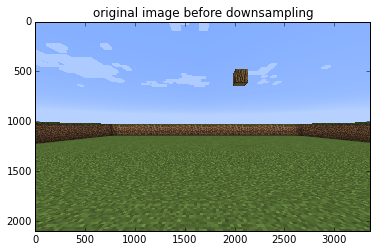

In [191]:
plt.imshow(scipy.ndimage.imread(PATH + '../processed/2001.png'));
plt.title('original image before downsampling');

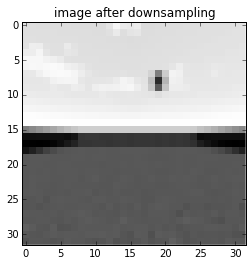

In [192]:
plt.imshow(images[2000], cmap=cm.Greys_r, interpolation='none');
plt.title('image after downsampling');

Do the different block types appear different at such a low resolution? We compare two types:

#### Stone

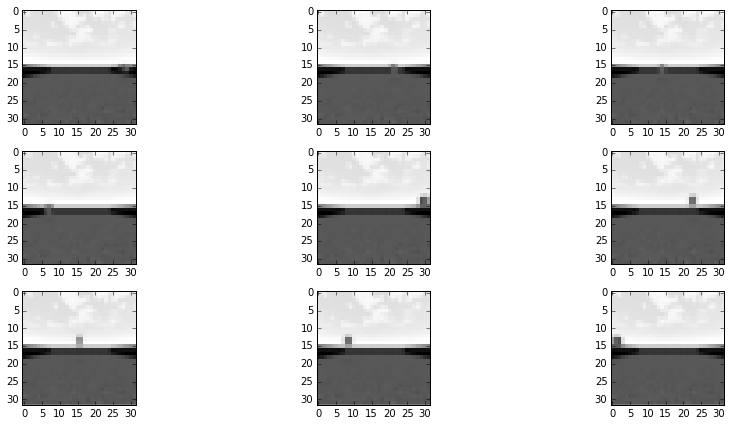

In [123]:
fig = plt.figure(num=None, figsize=(14, 6), dpi=80, facecolor='w', edgecolor='k');
for i in range(9):
    ax = fig.add_subplot(3,3,i+1);
    ax.imshow(images[i*5], interpolation='none', cmap=cm.Greys_r);
fig.tight_layout();

#### Diamond ore

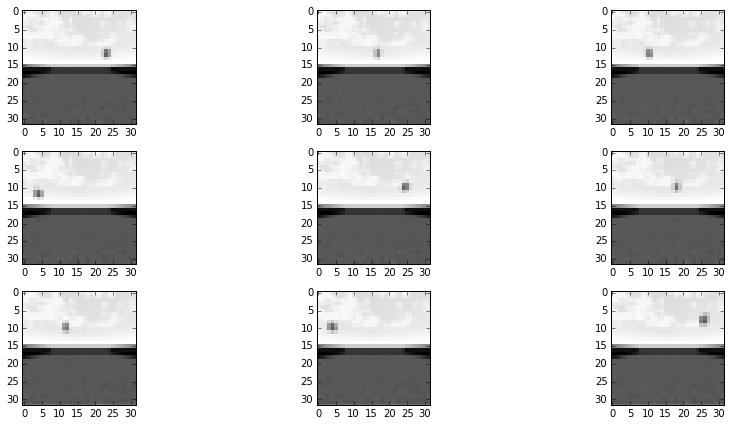

In [126]:
fig = plt.figure(num=None, figsize=(14, 6), dpi=80, facecolor='w', edgecolor='k');
for i in range(9):
    ax = fig.add_subplot(3,3,i+1);
    ax.imshow(images[1680*3 + i*5], interpolation='none', cmap=cm.Greys_r);
fig.tight_layout();

## PCA

In [37]:
X = images.reshape(8080, 32*32)

In [38]:
from sklearn.decomposition import PCA

### PCA with 2 principal components

In [39]:
pca = PCA(n_components=2)

In [40]:
pca.fit(X)

PCA(copy=True, n_components=2, whiten=False)

In [42]:
transformed = pca.transform(X)

In [43]:
transformed.shape

(8080, 2)

In [45]:
transformed[0]

array([ 29.39978388,  82.18893804])

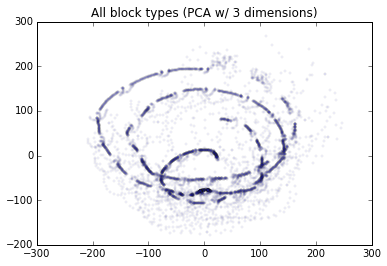

In [130]:
plt.scatter(*zip(*transformed), marker='.', alpha=0.05);
plt.ylim([-200, 300]);
plt.title('All block types (PCA w/ 3 dimensions)');

The data appears to live on a low-dimensional manifold. In a subsequent plot below, we separate the data into different classes in a similar plot.

What does it look like for just one block type? We plot it as follows:

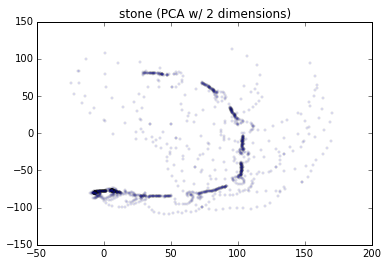

In [117]:
plt.scatter(*zip(*transformed[:1616]), marker='.', alpha=0.10);
plt.title('stone (PCA w/ 2 dimensions)');

#### Combined plot

In [176]:
colors = ['blue', 'red', 'brown', 'yellow', 'green']
block_types = ['stone', 'log', 'bedrock', 'diamond_ore', 'pumpkin']

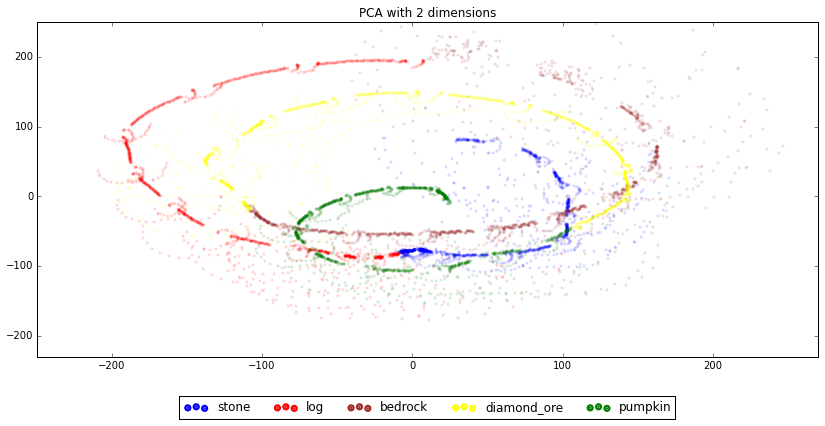

In [177]:
fig = plt.figure(num=None, figsize=(14, 6), dpi=80, facecolor='w', edgecolor='k');
for i in range(5):
    plt.scatter(*zip(*transformed[i*1616:(i+1)*1616]), marker='.', alpha=0.10, color=colors[i]);
plt.xlim([-250, 270]);
plt.ylim([-230, 250]);
leg = plt.legend(block_types, loc=9, bbox_to_anchor=(0.5, -0.1), ncol=len(block_types));
for legobj in leg.legendHandles:
    legobj.set_alpha(1)
    legobj.set_linewidth(5)
plt.title('PCA with 2 dimensions');

### PCA with 3 principal components

In [73]:
pca3 = PCA(n_components=3)

In [74]:
pca3.fit(X)

PCA(copy=True, n_components=3, whiten=False)

In [75]:
transformed3 = pca3.transform(X)

In [81]:
transformed3.shape

(8080, 3)

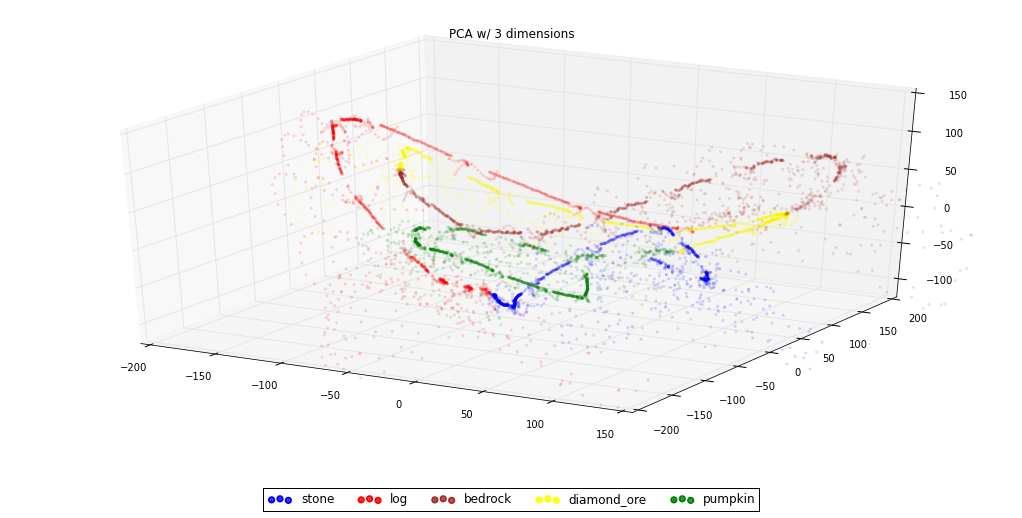

In [173]:
fig3 = plt.figure(num=None, figsize=(14, 6), dpi=80, facecolor='w', edgecolor='k');
ax3 = Axes3D(fig3);
for i in range(5):
    ax3.scatter3D(*zip(*transformed3[i*1616:(i+1)*1616]), marker='.', alpha=.1, color=colors[i]);
ax3.set_xlim3d((-200, 150));
ax3.set_ylim3d((-200, 200));
ax3.set_zlim3d((-120, 150));
leg = plt.legend(block_types, loc=9, bbox_to_anchor=(0.5, -0.1), ncol=len(block_types));
for legobj in leg.legendHandles:
    legobj.set_alpha(1)
    legobj.set_linewidth(5)
ax3.set_title('PCA w/ 3 dimensions');

**Some important questions:**
    
- Do the variations in clouds contribute significantly to these variations? Do the cloud patterns provide a temporal signal since they might be changing slowly over time; and the block types are also changing over time? Hence, does the factor of variation for the block type correlate with the variation of the background cloud patterns? In this extreme downsampled case with (32, 32) images the blocks are barely distinguishable; would the PCA still separate them so effectively without the clouds?
- How would the resultant low-dimensional embedding change if the resolution of the images used were higher? If they were color?